In [26]:
import numpy as np
plansza1 = np.array([
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,1,0,0,0],
    [0,0,0,1,1,1,1,0,0,0],
    [0,0,1,0,0,0,0,1,0,0],
    [0,0,1,0,1,1,0,1,0,0],
    [0,0,1,0,0,0,0,1,0,0],
    [0,0,0,1,1,1,1,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0]], np.uint8)

plansza2 = np.array([
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0],
    [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0],
    [0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]], np.uint8)

## Zadanie domowe: morfologiczna gra w życie – John Conway

### Wykorzystanie operacji LUT w przekształceniu trafi, nie trafi
  - Szybszą metodą wykonania transformacji trafi, nie trafi może być operacja LUT.
  - Technika polega na zakodowaniu wyników wszystkich interesujących  konfiguracji, a następnie podczas przetwarzania wykorzystania operacji LUT.
  - Dla otoczenia 3x3 możliwe jest 512 różnych konfiguracji.
  - Aby praktycznie zrealizować operacje, każdej konfiguracji należy nadać unikalny indeks. Jedną z możliwości jest pomnożenie elementu strukturalnego przez macierz (mnożenie odpowiednich elementów):
  ```
  [[1, 8,  64],
   [ 2, 16, 128],
   [ 4, 32, 256]]
  ```
  Przykładowo elementowi:
  ```
  [[1, 1, 0],
   [ 1, 0, 1],
   [ 1, 0, 1]]
  ```
  odpowiada liczba: 1(1) + 2(1) + 4(1) + 8(1) + 128(1) + 256(1) = 399.
  
### Przykład działania metody – detekcja punktów końcowych na obrazie.
  - założenie: punkt końcowy to punkt, który ma dokładnie jednego sąsiada,
  - zdefiniuj funkcję, która jako argument pobiera otoczenie, a zwraca 0 lub 1 w zależności od tego, czy rozpatrywany punkt jest końcowy np. dla sąsiedztwa 3×3 punkt będzie końcowy, jeżeli jest zapalony i ma tylko jednego sąsiada (czyli suma pikseli jest równa 2).
  - wygeneruj przekodowanie LUT.
  - wczytaj obraz szkielet.bmp (należy go przekształcić, aby uzyskać dwuwymiarową tablicę o wartościach 0-1). Wykorzystując wygenerowane przekodowanie LUT wykonaj detekcję zakończeń. Wyświetl obraz oryginalny i po przekodowaniu LUT.

### Gra w życie

Reguły gry w życie:
  - każdy piksel biały, który ma dwóch lub trzech sąsiadów (białych) przeżywa,
  - każdy piksel biały, który ma 0,1 lub więcej niż trzech sąsiadów (białych) nie przeżywa (głód lub przeludnienie),
  - jeżeli jakieś pole (czarne) sąsiaduje dokładnie z trzema pikselami białymi, to na tym polu ,,rodzi'' się nowy piksel biały.

Zadanie:
  - za pomocą mechanizmu LUT (opisanego wcześniej) należy zaimplementować morfologiczną gre w życie,
  - najważniejszym elementem jest funkcja opisująca reguły gry,
  - symulacje należny przeprowadzić dla plansz dostarczonych w pliku gra.py,
  - dobrze jest wykonać kilka iteracji – zobaczyć jak zmienia się kształt,
  - inne ciekawe kształty do znalezienia w internecie.


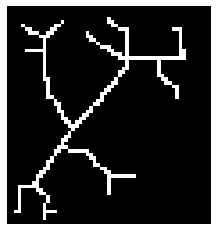

In [3]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

if not os.path.exists("szkielet.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/10_Morfologia/szkielet.bmp --no-check-certificate

I_szkielet = cv2.imread('szkielet.bmp', cv2.IMREAD_GRAYSCALE)

transf = np.array([[1,8,64],[2,16,128],[4,32,256]])


plt.imshow(I_szkielet, 'gray', vmin=0, vmax=256)
plt.axis('off')
plt.show()

In [7]:
def count_bits(n):
    count = 0
    while n:
        n = n & (n-1)
        count += 1
    return count

In [51]:
lut = np.zeros(512)
for i in range(0b001000000000):
    if (i & 0b000010000):
        if(count_bits(i)==2):
            lut[i]=1
    else:
        lut[i]=0

In [52]:
def pkt_end(oto):
    M = np.array([[1,8,64],[2,16,128],[4,32,256]])
    X,Y = oto.shape
    oto=oto/255
    oto = oto.astype(bool)
    nr=np.sum(M, where = oto)
    return lut[int(nr)]

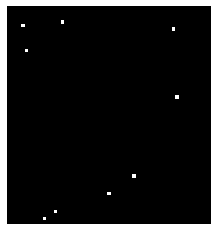

In [53]:
X,Y = I_szkielet.shape
kopia = np.zeros((X,Y))
for i in range(1,X-1):
    for j in range(1,Y-1):
        oto = I_szkielet[i-1:i+2,j-1:j+2]
        piksel = pkt_end(oto)
        kopia[i,j] = piksel

plt.imshow(kopia, 'gray', vmin=0, vmax=1)
plt.axis('off')
plt.show()

In [40]:
def przekodowania():
    lut_for_game = np.zeros(512)
    for i in range(0b001000000000):
        if (i & 0b000010000):
            if(count_bits(i)==3 or count_bits(i)==4):
                lut_for_game[i]=1
            else:
                lut_for_game[i]=0
        else:
            if(count_bits(i)==3):
                lut_for_game[i]=1
            else:
                lut_for_game[i]=0
    return lut_for_game

In [41]:
def pkt_is_alive(otocze,przekod):
    M = np.array([[1,8,64],[2,16,128],[4,32,256]])
    otocze = otocze.astype(bool)
    nr=np.sum(M, where = otocze)
    return przekod[int(nr)]

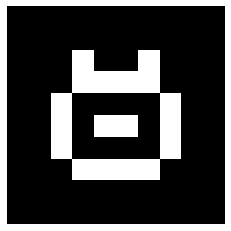

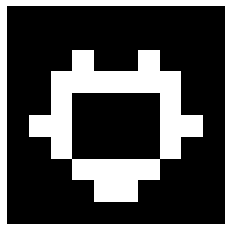

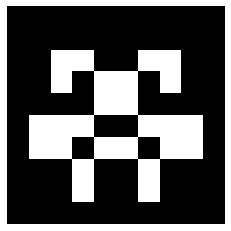

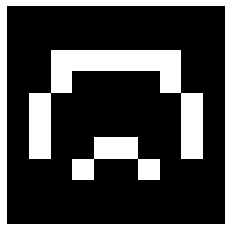

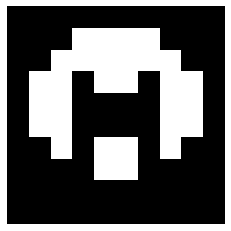

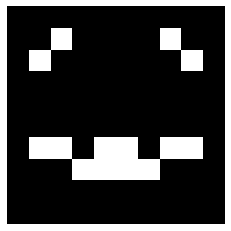

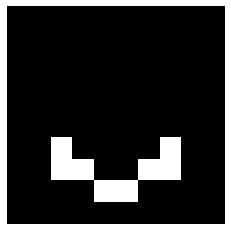

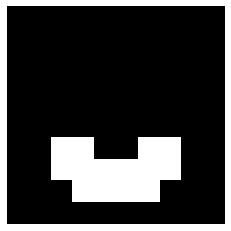

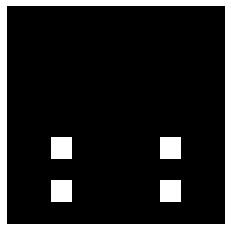

In [45]:
lut_game = przekodowania()
X,Y = plansza1.shape
old_one = plansza1.copy()
plt.imshow(plansza1, 'gray', vmin=0, vmax=1)
plt.axis('off')
plt.show()
for k in range(8):
    new_one = np.zeros((X,Y))
    for i in range(1,X-1):
        for j in range(1,Y-1):
            oto = old_one[i-1:i+2,j-1:j+2]
            piksel = pkt_is_alive(oto,lut_game)
            new_one[i,j] = piksel
    
    plt.imshow(new_one, 'gray', vmin=0, vmax=1)
    plt.axis('off')
    plt.show()
    old_one = new_one.copy()

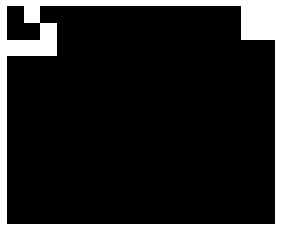

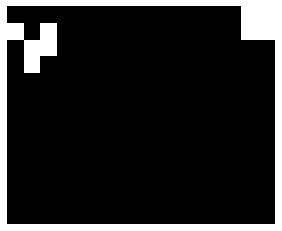

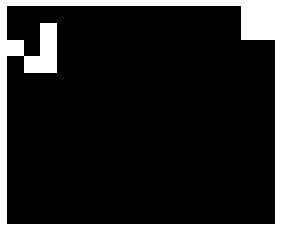

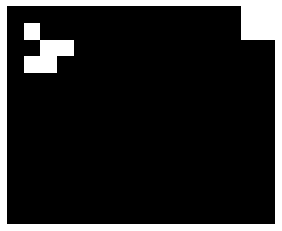

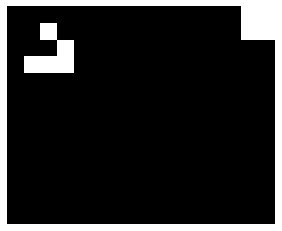

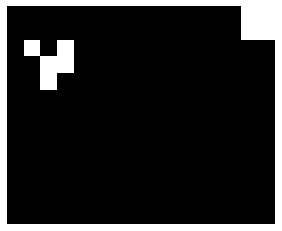

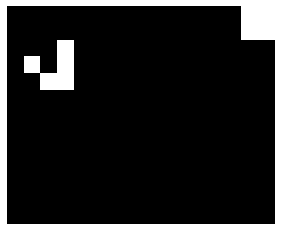

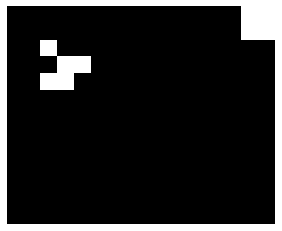

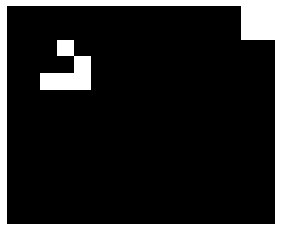

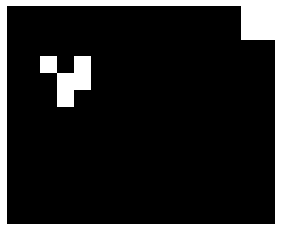

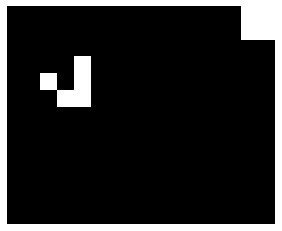

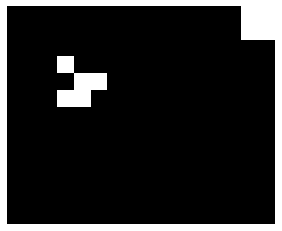

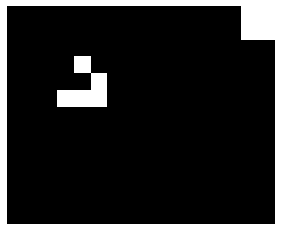

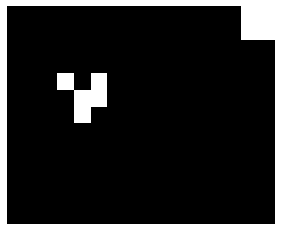

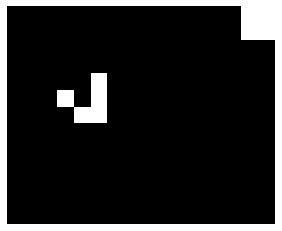

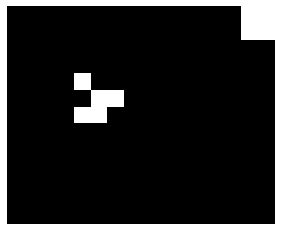

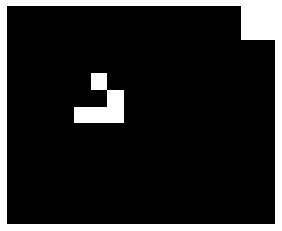

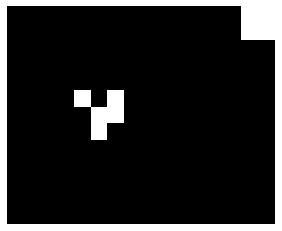

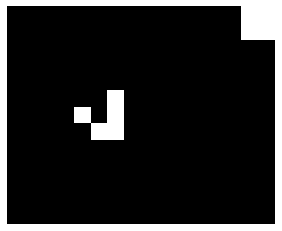

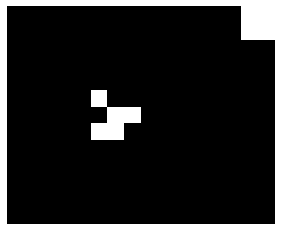

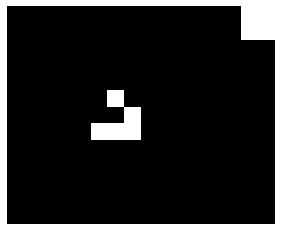

In [47]:
lut_game = przekodowania()
X,Y = plansza2.shape
old_one = plansza2.copy()
plt.imshow(plansza2[1:-1,1:-1], 'gray', vmin=0, vmax=1)
plt.axis('off')
plt.show()
for k in range(20):
    new_one = np.zeros((X,Y))
    for i in range(1,X-1):
        for j in range(1,Y-1):
            oto = old_one[i-1:i+2,j-1:j+2]
            piksel = pkt_is_alive(oto,lut_game)
            new_one[i,j] = piksel
    
    plt.imshow(new_one[1:-1,1:-1], 'gray', vmin=0, vmax=1)
    plt.axis('off')
    plt.show()
    old_one = new_one.copy()